In [1]:
from draw3d import *
from draw2d import *
from vectors import *

In [ ]:
p1 = (2,2,30)
p2 = (1,-2,-3)
draw3d(
    Points3D(p1, p2),
    Arrow3D(p1),
    Arrow3D(p2),
    Segment3D(p1, p2),
    Box3D(p1[0], p1[1], p1[2]),
    Box3D(p2[0], p2[1], p2[2])
)

In [ ]:
p1 = (-1, -2, 2)
draw3d(Points3D(p1),
       Arrow3D(p1),
       Box3D(p1[0], p1[1], p1[2]))

In [ ]:
pm1 = [1, -1]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1 ]
edges += [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1]
edges += [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]
draw3d(Points3D(*vertices),
       *[Segment3D(*edge) for edge in edges])

In [ ]:
vectors = [p1, p2]
vec_sum = add(*vectors)
draw3d(
    Arrow3D(p1),
    Arrow3D(p2),
    # Box3D(p1[0], p1[1], p1[2]),
    # Box3D(p2[0], p2[1], p2[2]),
    Arrow3D(vec_sum, color='blue')
)

In [ ]:
p1 = (4, 0, 3)
p2 = (-1, 0, 1)
p = add(p1, p2)
draw3d(
    Arrow3D(p1, color='k'),
    Arrow3D(p2, color='red'),
    Arrow3D(p, color='blue'),
    Arrow3D(p, p1, color='red'),
    Arrow3D(p, p2, color='k')
)

In [ ]:
from math import sin, cos, pi
count = 24
vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,count)]
tmp = (0, 0, 0)
arrow_list = []
for i in range(0, count):
    prev = tmp
    tmp = add(tmp, vs[i])
    arrow_list.append(Arrow3D(tmp, prev))
draw3d(
    *arrow_list
)

In [ ]:
p1 = (1, 2, -1)
p2 = (3, 0, 3)
d = dot(p1, p2)
print(d)
draw3d(Arrow3D(p1), Arrow3D(p2))

In [2]:
octahedron = [
    [(1,0,0), 
(0,1,0), (0,0,1)],    [(1,0,0), 
(0,0,-1), (0,1,0)],    [(1,0,0), 
(0,0,1), (0,-1,0)],    [(1,0,0), 
(0,-1,0), (0,0,-1)],    [(-1,0,0),
 (0,0,1), (0,1,0)],    [(-1,0,0),
 (0,1,0), (0,0,-1)],    [(-1,0,0),
 (0,-1,0), (0,0,1)],    [(-1,0,0),
 (0,0,-1), (0,-1,0)],]

def verticles(faces):
    return list(set(vertex for face in faces for vertex in face))

def component(v, direction):
    return dot(v, direction) / length(direction)

def vector_to_2d(v):
    return (component(v, (1,0,0)), component(v, (0,1,0)))

def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

blues = matplotlib.cm.get_cmap('Blues')

def unit(v):
    return scale(1./length(v), v)

def normal(face):
    return (cross(subtract(face[1], face[0]), subtract(face[2], face[0])))

def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face))
        if unit_normal[2] > 0:
            c = color_map(1 - dot(unit(normal(face)), unit(light)))
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines)
            polygons.append(p)
    draw2d(*polygons, axes=False, origin=False, grid=None)

/var/folders/pm/r8fcp13s1gqgh20ly21fl73c0000gn/T/ipykernel_40613/2116814086.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues = matplotlib.cm.get_cmap('Blues')


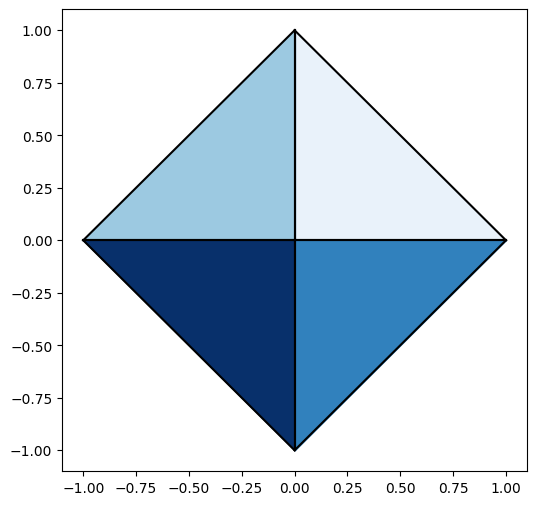

In [5]:
render(octahedron, color_map=blues, lines=black)

In [15]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

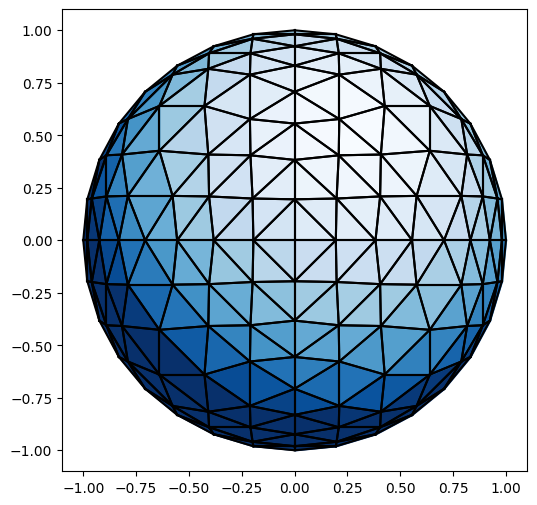

In [25]:
render(sphere_approx(3), lines='k')

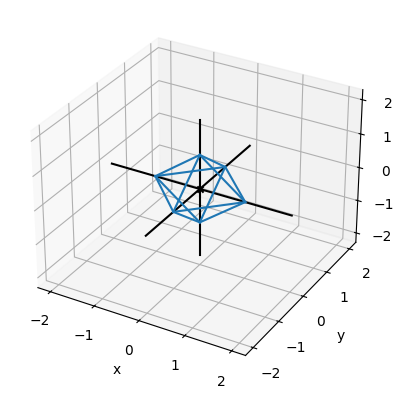

In [26]:
top = (0, 0, 1)
bottom = (0, 0, -1)
xy_plane = [(1,0,0),(0,1,0),(-1,0,0),(0,-1,0)]
edges = [Segment3D(top,p) for p in xy_plane] +\
    [Segment3D(bottom, p) for p in xy_plane] +\
    [Segment3D(xy_plane[i],xy_plane[(i+1)%4 ]) for i in range(0,4)]

draw3d(*edges)